<a href="https://colab.research.google.com/github/Dhamia96/Pandas_Series/blob/main/stc_TV_T2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# STC Jawwy

In [1]:
"""
Here we install libraries that are not installed by default
Example:  pyslsb
Feel free to add any library you are planning to use.
"""
!pip install pyxlsb

In [2]:
!pip install prophet

In [3]:
# Import the required libraries
"""
Please feel free to import any required libraries as per your needs
"""
import pandas as pd     # provides high-performance, easy to use structures and data analysis tools
import pyxlsb           # Excel extention to read xlsb files (the input file)
import numpy as np      # provides fast mathematical computation on arrays and matrices

# Jawwy dataset
The dataset includes total watching hours for customers per day.

You are required to work on predecting the forecast for the watching hours.

In [4]:
dataframe = pd.read_excel("/content/stc TV Data Set_T2.xlsb",index_col=0)
# Please make a copy of dataset if you are going to work directly and make changes on the dataset
# you can use   df=dataframe.copy()

In [5]:
# check the data shape
dataframe.shape

(86, 2)

In [6]:
# display the first 5 rows
dataframe.head()

,date_,Total_watch_time_in_houres
0,2018-01-01,1123.551944
1,2018-01-02,1000.129722
2,2018-01-03,881.924444
3,2018-01-04,782.669444
4,2018-01-05,1051.939444


In [7]:
dataframe.isnull().any()

date_                         False
Total_watch_time_in_houres    False
dtype: bool

In [8]:
# describe the numeric values in the dataset
dataframe.describe()

,Total_watch_time_in_houres
count,86.000000
mean,780.817926
std,122.992002
min,562.124722
25%,707.709653
50%,763.181389
75%,840.985278
max,1123.551944


In [9]:
# we import Visualization libraries
# you can ignore and use any other graphing libraries
import matplotlib.pyplot as plt # a comprehensive library for creating static, animated, and interactive visualizations
import plotly #a graphing library makes interactive, publication-quality graphs. Examples of how to make line plots, scatter plots, area charts, bar charts, error bars, box plots, histograms, heatmaps, subplots, multiple-axes, polar charts, and bubble charts.
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [10]:
# show the dataframe
fig = px.line(dataframe,x="date_",  y="Total_watch_time_in_houres")
fig.show()

In [11]:
"""
TODO using the previous dataset (df) build a prediction model to predict the expected watch time for the next two months
Hint: you can build a forecast model to predict the results
"""

'\nTODO using the previous dataset (df) build a prediction model to predict the expected watch time for the next two months\nHint: you can build a forecast model to predict the results\n'

In [12]:
#displaying the fisrt and last date on our dataset
dataframe['date_'].min(), dataframe['date_'].max()

(Timestamp('2018-01-01 00:00:00'), Timestamp('2018-04-30 00:00:00'))

In [13]:
from prophet import Prophet
model= Prophet()

# Prepare data for the model
dataframe.rename(columns = {'date_':'ds', 'Total_watch_time_in_houres': 'y'}, inplace = True)
dataframe['ds'] = pd.to_datetime(dataframe['ds'])
dataframe.head()

,ds,y
0,2018-01-01,1123.551944
1,2018-01-02,1000.129722
2,2018-01-03,881.924444
3,2018-01-04,782.669444
4,2018-01-05,1051.939444


In [14]:
#fit the model
model.fit(dataframe)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjr2k7m3y/y38y5_9u.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjr2k7m3y/dwr_c4n6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=58712', 'data', 'file=/tmp/tmpjr2k7m3y/y38y5_9u.json', 'init=/tmp/tmpjr2k7m3y/dwr_c4n6.json', 'output', 'file=/tmp/tmpjr2k7m3y/prophet_modelukdhe4pj/prophet_model-20230909010229.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
01:02:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:02:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [15]:
#Create a dataframe with the next two months
future_dates = model.make_future_dataframe(periods=60)  # Predicting for 60 days

In [19]:
future_dates.tail()

,ds
141,2018-06-25
142,2018-06-26
143,2018-06-27
144,2018-06-28
145,2018-06-29


In [16]:
#predict the result for the two next months
forecast= model.predict(future_dates)

In [22]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
141,2018-06-25,527.043857,407.999290,642.206675
142,2018-06-26,514.130008,393.485241,628.023555
143,2018-06-27,495.176929,378.964905,619.205836
144,2018-06-28,496.827148,378.299690,608.280163
145,2018-06-29,522.821631,395.476475,640.614449


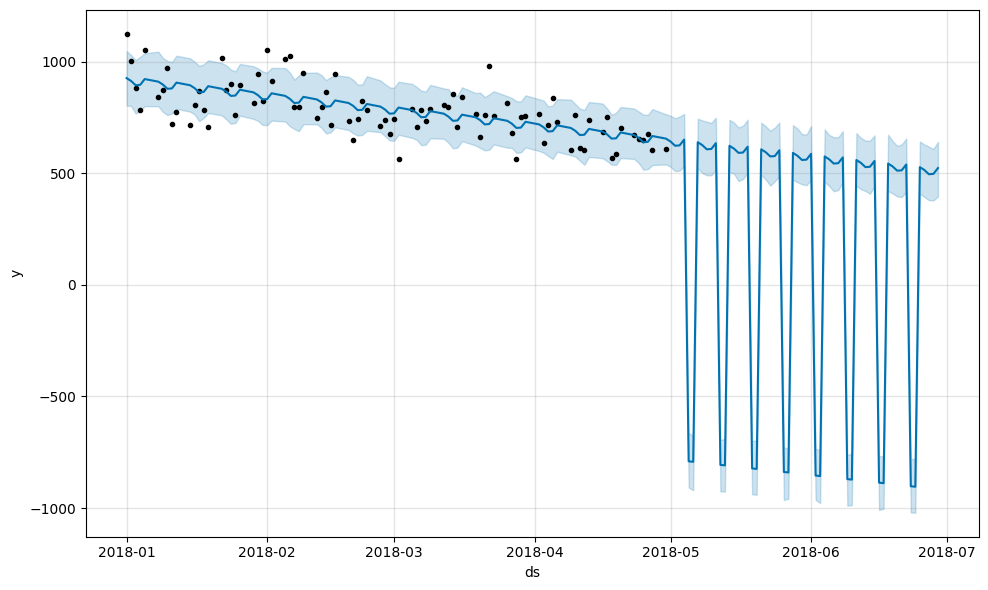

In [17]:
fig= model.plot(forecast)

#####The light blue is the uncertainty level(yhat_upper and yhat_lower), the dark blue is the prediction(yhat) and the black dots are the original data.

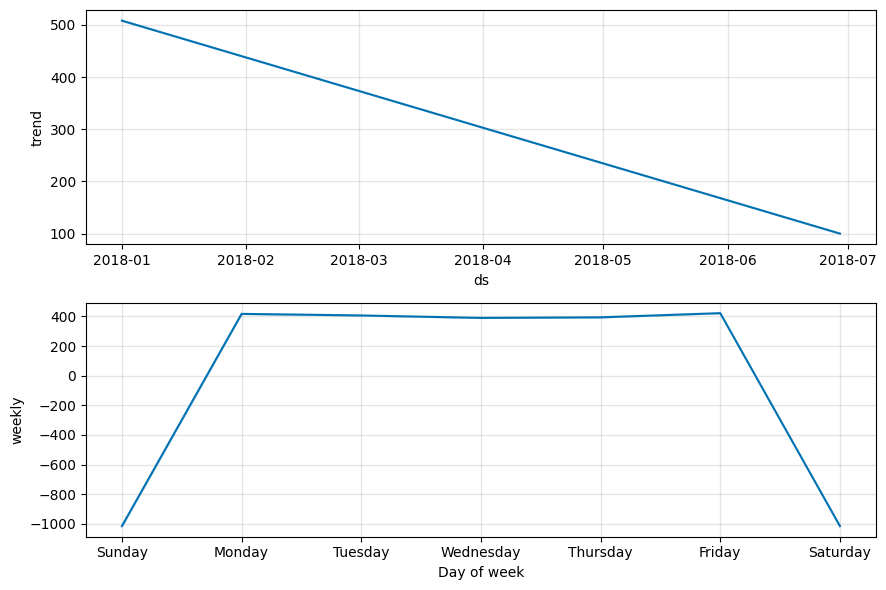

In [23]:
fig2 = model.plot_components(forecast)

We can see a Decreasing trend for the first graph.

